# Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_colwidth', 70)

In [2]:
df_raw = pd.read_csv('rumah123_bekasiv2.csv')

In [3]:
df = df_raw.copy()

In [4]:
df.head(3)

,user,phone_number,agent_corporate,property_location,description,price,property_type,bed,bath,garage,LT,LB,listing_type,property_url
0,Julia Lee,+62813662...,Era Sky Harapan Indah,"Harapan Indah, Bekasi",Rumah Siap Huni di Harapan Indah Cluster Adara Bekasi,"Rp 1,8 Miliar",Rumah,2.0,2.0,1.0,128.0,80.0,Premier,https://www.rumah123.com/properti/bekasi/hos13715709/
1,Hanni,+62816178...,Era Sky Harapan Indah,"Harapan Indah, Bekasi",Rumah Untuk Renovasi di Harapan Indah Cocok Untuk Investasi,"Rp 1,35 Miliar",Rumah,5.0,2.0,1.0,234.0,120.0,Premier,https://www.rumah123.com/properti/bekasi/hos15487164/
2,susi ERASKY,NaN,Era Sky Harapan Indah,"Harapan Indah, Bekasi",cepat rumah 2 lantai termurah di bulevar hijau harapan indah Bekasi,Rp 1 Miliar,Rumah,4.0,2.0,1.0,94.0,120.0,Premier,https://www.rumah123.com/properti/bekasi/hos11582175/


In [5]:
df.shape

(87504, 14)

In [6]:
# Create Data Info After Convert
list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique(), df[col].unique()[:4]])
desc_df = pd.DataFrame(data=list_item, columns='feature data_type null_num null_pct unique_num unique_sample'.split())
desc_df

,feature,data_type,null_num,null_pct,unique_num,unique_sample
0,user,object,0,0.000000,4755,"[Julia Lee, Hanni, susi ERASKY, Mylana RWSB]"
1,phone_number,object,12228,13.974218,2632,"[+62813662..., +62816178..., nan, +62813108...]"
2,agent_corporate,object,10341,11.817745,945,"[Era Sky Harapan Indah, RAY WHITE SUMMARECON BEKASI, Ray White Har..."
3,property_location,object,0,0.000000,86,"[Harapan Indah, Bekasi, Jatibening, Bekasi, Bekasi, Bekasi, Taruma..."
4,description,object,0,0.000000,72148,"[Rumah Siap Huni di Harapan Indah Cluster Adara Bekasi, Rumah Untu..."
5,price,object,0,0.000000,2893,"[Rp 1,8 Miliar, Rp 1,35 Miliar, Rp 1 Miliar, Rp 2,92 Miliar]"
6,property_type,object,0,0.000000,8,"[Rumah, Apartemen, Gudang, Tanah]"
7,bed,float64,19277,22.029850,48,"[2.0, 5.0, 4.0, 3.0]"
8,bath,float64,11735,13.410816,57,"[2.0, 3.0, 4.0, 1.0]"
9,garage,float64,38346,43.821997,39,"[1.0, nan, 2.0, 10.0]"


In [7]:
df[df['LT'].isna()].head(5)

,user,phone_number,agent_corporate,property_location,description,price,property_type,bed,bath,garage,LT,LB,listing_type,property_url
1824,Tycoon Universal,+62882101...,Century21 Universal,"Cikarang, Bekasi",Ruko Bagus Dan Nyaman Di Cikarang Jawa Barat,"Rp 3,5 Miliar Total",Ruko,NaN,3.0,NaN,NaN,NaN,Regular,https://www.rumah123.com/properti/bekasi/shs3848931/
1826,Mei,+62817679...,Century21 Universal,"Cikarang, Bekasi",Ruko Bagus Dan Nyaman Di Cikarang Jawa Barat,"Rp 3,5 Miliar Total",Ruko,NaN,3.0,NaN,NaN,NaN,Regular,https://www.rumah123.com/properti/bekasi/shs3848797/
1830,Ina Karlina,+62815915...,Century21 Universal,"Cikarang, Bekasi",Ruko Bagus Dan Nyaman Di Cikarang Jawa Barat,"Rp 3,5 Miliar Total",Ruko,NaN,3.0,NaN,NaN,NaN,Regular,https://www.rumah123.com/properti/bekasi/shs3848663/
2304,sithal,+62813881...,LJ Hooker Buaran,"Tambun Selatan, Bekasi",Pabrik Karya Logam Tambun Bekasi,Rp 18 Miliar Total,Pabrik,NaN,NaN,NaN,NaN,NaN,Regular,https://www.rumah123.com/properti/bekasi/fas3746332/
2310,Imron Rosyadi,+62821385...,Century21 United Pulomas,"Tambun Selatan, Bekasi",Tambun Utara bekasi,"Rp 2,5 Miliar Total",Gudang,NaN,NaN,NaN,NaN,NaN,Regular,https://www.rumah123.com/properti/bekasi/was3741945/


# Data Cleaning

## Handling Duplicated Values

In [8]:
df.duplicated().sum()

27

In [9]:
df[df.duplicated()].head(10)

,user,phone_number,agent_corporate,property_location,description,price,property_type,bed,bath,garage,LT,LB,listing_type,property_url
2892,icalcool,+62812190...,Brotherz Property,"Bekasi Kota, Bekasi",Rumah Emerald Terrace Bekasi Rumah Tanpa DP Fasilitas Swimming Pool,Rp 995 Juta,Rumah,2.0,2.0,1.0,60.0,48.0,Regular,https://www.rumah123.com/properti/bekasi/hos14837580/
4700,Carmelya Tan,+62816139...,Century21 Metro 1,"Bekasi Barat, Bekasi",Rumah di Harapan Baru 1 Bekasi 2 Lantai,Rp 1 Miliar,Rumah,6.0,2.0,NaN,120.0,150.0,Regular,https://www.rumah123.com/properti/bekasi/hos6220370/
5900,miya,+62812946...,Asia One Grand Galaxy,"Summarecon Bekasi, Bekasi","Dijual Rumah 2 Lantai Siap Huni di Cluster Summarecon, Bekasi","Rp 1,65 Miliar",Rumah,2.0,2.0,NaN,66.0,72.0,Regular,https://www.rumah123.com/properti/bekasi/hos15094485/
7420,Yohanes,+62812148...,Ray White Kelapa Gading Timur,"Bekasi Barat, Bekasi",Rumah Cantik Komplek Violet Garden Kranji Kota Bekasi,"Rp 1,8 Miliar",Rumah,3.0,1.0,NaN,110.0,60.0,Regular,https://www.rumah123.com/properti/bekasi/hos14388557/
12020,Timmy Property,NaN,NaN,"Summarecon Bekasi, Bekasi",Rumah Murah Bagus Siap Huni Di Cluster Burgundy Summarecon Bekasi,"Rp 1,1 Miliar",Rumah,2.0,2.0,1.0,55.0,55.0,Regular,https://www.rumah123.com/properti/bekasi/hos10838404/
16960,Christie,+62823117...,Era Sky Harapan Indah,"Harapan Indah, Bekasi",Dijual Rumah Depan Taman di Cluster Aralia Harapan Indah Bekasi,"Rp 2,15 Miliar",Rumah,3.0,2.0,1.0,160.0,125.0,Regular,https://www.rumah123.com/properti/bekasi/hos15337580/
19000,Wanti Fun,+62817653...,Century21 Metro 1,"Harapan Indah, Bekasi",Rumah Di Bulevar Hijau Bekasi Kota,"Rp 1,2 Miliar",Rumah,3.0,3.0,NaN,94.0,94.0,Regular,https://www.rumah123.com/properti/bekasi/hos15260113/
23340,Verdiansah Apriyanto,NaN,NaN,"Jatiwarna, Bekasi",Rumah Siap Huni Model Scandinavian Dekat ke Gerbang Tol Jatiwarna,Rp 995 Juta,Rumah,3.0,2.0,1.0,71.0,100.0,Regular,https://www.rumah123.com/properti/bekasi/hos14864325/
24502,Wihartuti LJHKGT,NaN,LJ hooker Kelapa Gading Timur,"Cikarang, Bekasi","Ruko Ruko Thamrin Jababeka, Cikarang, Bekasi, Jawa Barat","Rp 3,3 Miliar Total",Ruko,NaN,NaN,NaN,40.0,96.0,Regular,https://www.rumah123.com/properti/bekasi/shs3703098/
30181,Dyahpuspadewi,+62813859...,NaN,"Bekasi Kota, Bekasi",Jatirasa Jatiasih Rumah second terawat deket Galaxy,"Rp 1,05 Miliar",Rumah,3.0,3.0,1.0,150.0,150.0,Regular,https://www.rumah123.com/properti/bekasi/hos14731040/


In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

## Handling Null Values
When handling null values dropping it should be the last option, the method that we use to handling the null should depend on the context of the null values, in the case of our data: 

### `phone_number` and `agent_corporate` 
> can be easily replaced with new string values since having null values in this case can only mean one thing that is "No information provided". 

In [12]:
df['phone_number'] = df['phone_number'].fillna('No phone number')
df['agent_corporate'] = df['agent_corporate'].fillna('No agent corporate')

### `bed`, `bath`, and `garage` 
> can have multiple meanings it's either "No information provided" or "The property either doesn't have bed, bath, or garage" this makes sense in some property type, for example property like Gudang, Tanah, Ruko, Ruang Usaha, Kantor, Pabrik usually dont have a bedroom. Having multiple possibility over the actual value leave room for choosing the appropriate cleaning method, we can easily put zero on all of those properties by default but we can do something better. For example, in analyze step where we want to get the descriptive statistics like mean we gonna impute the null with it's median or mean, in modeling step we can choose model that can take null values such as XGBoost.

In [13]:
df['property_type'].unique()

array(['Rumah', 'Apartemen', 'Gudang', 'Tanah', 'Ruko', 'Pabrik',
       'Ruang Usaha', 'Kantor'], dtype=object)

#### Bed

In [14]:
for property_type in ['Gudang', 'Tanah', 'Ruko', 'Ruang Usaha', 'Kantor', 'Pabrik']:
    print(f'Property type: {property_type}')
    print(df[df['property_type']==property_type]['bed'].value_counts())

Property type: Gudang
Series([], Name: bed, dtype: int64)
Property type: Tanah
Series([], Name: bed, dtype: int64)
Property type: Ruko
Series([], Name: bed, dtype: int64)
Property type: Ruang Usaha
Series([], Name: bed, dtype: int64)
Property type: Kantor
4.0    1
Name: bed, dtype: int64
Property type: Pabrik
Series([], Name: bed, dtype: int64)


For non settlement property we can put zero in the number of bed

In [15]:
property_types = ['Gudang', 'Tanah', 'Ruko', 'Ruang Usaha', 'Kantor', 'Pabrik']
df.loc[df['property_type'].isin(property_types), 'bed'] = df.loc[df['property_type'].isin(property_types), 'bed'].fillna(0)

In [16]:
(df.isnull().sum()/df.shape[0])*100

user                  0.000000
phone_number          0.000000
agent_corporate       0.000000
property_location     0.000000
description           0.000000
price                 0.000000
property_type         0.000000
bed                   1.886210
bath                 13.409239
garage               43.817232
LT                    0.277787
LB                   11.813391
listing_type          0.000000
property_url          0.000000
dtype: float64

We only have 1.8% left, we can drop the rest.

In [17]:
settlement_property = ['Rumah', 'Apartemen']

In [18]:
df.loc[(df['property_type'].isin(settlement_property))&(df['bed'].isna()), 'bed'].shape

(1650,)

In [19]:
# settlement_property = ['Rumah', 'Apartemen']
# df.dropna(subset=['bed'], inplace=True)

In [20]:
df['property_type'].value_counts()

Rumah          66701
Tanah           6810
Ruko            6040
Gudang          3227
Apartemen       3156
Pabrik           757
Ruang Usaha      607
Kantor           179
Name: property_type, dtype: int64

In [21]:
df[df['bed'].isna()].head(3)

,user,phone_number,agent_corporate,property_location,description,price,property_type,bed,bath,garage,LT,LB,listing_type,property_url
115,Fitri RWSB,+62877854...,RAY WHITE SUMMARECON BEKASI,"Grand Wisata, Bekasi","Rumah Grand Wisata Tol Dalam Kawasan ,5 Menit Mall Living Word","Rp 1,07 Miliar",Rumah,NaN,NaN,NaN,60.0,55.0,Regular,https://www.rumah123.com/properti/bekasi/hos14105597/
157,Sugi Hartono,+62813116...,Galaxy Media Property,"Galaxy, Bekasi",Rumah artis dijamin Bebas Banjir tanah luas Jaka Setia Galaxy Bekasi,"Rp 2,7 Miliar",Rumah,NaN,NaN,NaN,314.0,300.0,Premier,https://www.rumah123.com/properti/bekasi/hos12944049/
219,Rumahku,No phone number,No agent corporate,"Jati Asih, Bekasi",Dijual Rumah di Jati Asih,Rp 1 Miliar,Rumah,NaN,NaN,NaN,52.0,50.0,Premier,https://www.rumah123.com/properti/bekasi/hos15750357/


#### Bath

There are quite high number (13.40%) of null values from bath.

In [22]:
(df.isnull().sum()/df.shape[0])*100

user                  0.000000
phone_number          0.000000
agent_corporate       0.000000
property_location     0.000000
description           0.000000
price                 0.000000
property_type         0.000000
bed                   1.886210
bath                 13.409239
garage               43.817232
LT                    0.277787
LB                   11.813391
listing_type          0.000000
property_url          0.000000
dtype: float64

#### Find the reason why there are nulls

Property like "Tanah" dont have a building hence dont have a bathroom.

In [23]:
df.loc[df['bath'].isna()].property_type.value_counts()

Tanah          6810
Gudang         1606
Rumah          1457
Ruko           1126
Pabrik          369
Ruang Usaha     184
Kantor           99
Apartemen        79
Name: property_type, dtype: int64

In [24]:
df.loc[(df['property_type'] == 'Tanah') & df['bath'].isna(), 'bath'] = 0

In [25]:
df.loc[df['bath'].isna()].property_type.value_counts()

Gudang         1606
Rumah          1457
Ruko           1126
Pabrik          369
Ruang Usaha     184
Kantor           99
Apartemen        79
Name: property_type, dtype: int64

In [26]:
#df.dropna(subset=['bath'], inplace=True)

We succesfully drop the null from 13% to 5%. We gonna handle the rest depending on our goal so we just gonna ignore it for now.

In [27]:
(df.isnull().sum()/df.shape[0])*100

user                  0.000000
phone_number          0.000000
agent_corporate       0.000000
property_location     0.000000
description           0.000000
price                 0.000000
property_type         0.000000
bed                   1.886210
bath                  5.624336
garage               43.817232
LT                    0.277787
LB                   11.813391
listing_type          0.000000
property_url          0.000000
dtype: float64

#### Garage
It's so rare for property sellers to not add garage information since it's affect the price of the property like house. So the intuitive reason why there is null in the garage field simply because they dont have one. So we can put zero as a replacement.

In [28]:
df[df['garage'].isna()]['property_type'].value_counts()

Rumah          20598
Tanah           6810
Ruko            4194
Apartemen       3156
Gudang          2474
Pabrik           550
Ruang Usaha      415
Kantor           133
Name: property_type, dtype: int64

In [29]:
df['garage'].fillna(0, inplace=True)

In [30]:
df[df['garage'].isna()]['property_type'].value_counts()

Series([], Name: property_type, dtype: int64)

In [31]:
(df.isnull().sum()/df.shape[0])*100

user                  0.000000
phone_number          0.000000
agent_corporate       0.000000
property_location     0.000000
description           0.000000
price                 0.000000
property_type         0.000000
bed                   1.886210
bath                  5.624336
garage                0.000000
LT                    0.277787
LB                   11.813391
listing_type          0.000000
property_url          0.000000
dtype: float64

### `LB`

There are 11.81% null values on LB column

In [32]:
(df.isnull().sum()/df.shape[0])*100

user                  0.000000
phone_number          0.000000
agent_corporate       0.000000
property_location     0.000000
description           0.000000
price                 0.000000
property_type         0.000000
bed                   1.886210
bath                  5.624336
garage                0.000000
LT                    0.277787
LB                   11.813391
listing_type          0.000000
property_url          0.000000
dtype: float64

Theoritically most or even all of land property (tanah) doesn't have building and so they dont have `LB`, so we can simply replace it with 0. 

In [33]:
df.loc[(df['property_type'] == 'Tanah') & df['LB'].isna(), 'LB'] = 0

In [34]:
(df.isnull().sum()/df.shape[0])*100

user                 0.000000
phone_number         0.000000
agent_corporate      0.000000
property_location    0.000000
description          0.000000
price                0.000000
property_type        0.000000
bed                  1.886210
bath                 5.624336
garage               0.000000
LT                   0.277787
LB                   4.028487
listing_type         0.000000
property_url         0.000000
dtype: float64

In [35]:
df[df['LB'].isna()]['property_type'].value_counts(normalize=True)

Apartemen      0.895573
Ruko           0.037174
Rumah          0.030647
Gudang         0.021566
Pabrik         0.008797
Ruang Usaha    0.004824
Kantor         0.001419
Name: property_type, dtype: float64

But the reason differ for the apartment it turns out there is a faulty in my web scraper code that put the `LT` as `LB` by default if they dont specify complete set of LT and LB information. This is due to handling different web structure during scraping. Here's what we gonna do:
- For all null values on apartment group on LB column -> Set it as values on apartment group on LT column. (With same index)
- For all non null values on apartment group on LT column -> Set it as values on apartment group on LB column. (With same index)

Below is a single sample that demonstrate the LT and LB problem. You can validate by browsing the link if the LT value here is actually belong to LB.

In [36]:
df.loc[df['property_url'] == 'https://www.rumah123.com/properti/bekasi/aps3129052/']

,user,phone_number,agent_corporate,property_location,description,price,property_type,bed,bath,garage,LT,LB,listing_type,property_url
20,Erna Susilo,+62812800...,No agent corporate,"Jatibening, Bekasi",Apartemen Gateway Park Terkoneksi Dengan Stasiun Lrt Semifurnish,Rp 685 Juta,Apartemen,1.0,1.0,0.0,34.0,NaN,Premier,https://www.rumah123.com/properti/bekasi/aps3129052/


In [37]:
# Backup non null values for LT on apartment group with appropriate index
backup = df.loc[(df['property_type'] == 'Apartemen') & df['LT'].notna(), 'LT']
# Set null values from LB to LT column
df.loc[(df['property_type'] == 'Apartemen') & df['LT'].notna(), 'LT'] = df.loc[(df['property_type'] == 'Apartemen') & df['LB'].isna(), 'LB']
# Set non null values or backup values to null apartment group on LB column
df.loc[(df['property_type'] == 'Apartemen') & df['LB'].isna(), 'LB'] = backup
#df.loc[(df['property_type'] == 'Apartemen') & df['LB'].isna(), 'LB']

After handling we can validate the LT value now is belong to LB for this specific listing and That's been handled for all the problematic values using above code.

In [38]:
df.loc[df['property_url'] == 'https://www.rumah123.com/properti/bekasi/aps3129052/']

,user,phone_number,agent_corporate,property_location,description,price,property_type,bed,bath,garage,LT,LB,listing_type,property_url
20,Erna Susilo,+62812800...,No agent corporate,"Jatibening, Bekasi",Apartemen Gateway Park Terkoneksi Dengan Stasiun Lrt Semifurnish,Rp 685 Juta,Apartemen,1.0,1.0,0.0,NaN,34.0,Premier,https://www.rumah123.com/properti/bekasi/aps3129052/


We can also see that the null values on LT increase while the LB decrease. Indicate that we successfully handle the task.

In [39]:
(df.isnull().sum()/df.shape[0])*100

user                 0.000000
phone_number         0.000000
agent_corporate      0.000000
property_location    0.000000
description          0.000000
price                0.000000
property_type        0.000000
bed                  1.886210
bath                 5.624336
garage               0.000000
LT                   3.873018
LB                   0.433257
listing_type         0.000000
property_url         0.000000
dtype: float64

In [40]:
df[df['LB'].isna()]['property_type'].value_counts(normalize=True)

Ruko           0.345646
Rumah          0.284960
Gudang         0.200528
Pabrik         0.081794
Ruang Usaha    0.044855
Apartemen      0.029024
Kantor         0.013193
Name: property_type, dtype: float64

### `LT`

In [41]:
df[df['LT'].isna()]['property_type'].value_counts(normalize=True)

Apartemen      0.931523
Ruko           0.032172
Gudang         0.017414
Tanah          0.006198
Pabrik         0.005903
Rumah          0.003247
Ruang Usaha    0.003247
Kantor         0.000295
Name: property_type, dtype: float64

### `LT` and `LB`

In [42]:
df[(df['LT'].isna())&(df['LB'].isna())].shape

(222, 14)

In [43]:
df.dropna(subset=['LT', 'LB'], how='all', inplace=True)

In [44]:
df.isnull().sum()/df.shape[0]

user                 0.000000
phone_number         0.000000
agent_corporate      0.000000
property_location    0.000000
description          0.000000
price                0.000000
property_type        0.000000
bed                  0.018773
bath                 0.054117
garage               0.000000
LT                   0.036284
LB                   0.001799
listing_type         0.000000
property_url         0.000000
dtype: float64

In [45]:
df.shape

(87255, 14)

## Price Handling

For price it's still on string and we want to parse the value into the integer format. But here are the problems:
- The price is still on 'Ribu', 'Juta' or 'Milliar' Format.
- The price is still on decimal format 1.8, 1.35.
- The price is still on /m format

#### Solve:
- Using regular expression to extract the unit format, the decimal digit and detect the /m format to form a conditional statement.

#### Example:
Data: 'Rp 1,38 Milliar /m' -> group1('1,38') group2('Milliar') (/m can be detected using 'in' statement)

In [46]:
df[df['property_type'] == 'Tanah'].head(5)

,user,phone_number,agent_corporate,property_location,description,price,property_type,bed,bath,garage,LT,LB,listing_type,property_url
47,Yuliani Setiyowati,+62821226...,RAY WHITE SUMMARECON BEKASI,"Bekasi, Bekasi","Cepat Tanah Pinggir Jalan Raya Setu Serang, Bekasi",Rp 10 Miliar Total,Tanah,0.0,0.0,0.0,6790.0,0.0,Featured,https://www.rumah123.com/properti/bekasi/las3091741/
48,Ida RWKG,+62812958...,Ray White Kelapa Gading,"Bekasi, Bekasi","Kavling Marunda Center, Bekasi Luas 1.614m2","Rp 5,8 Juta /m²",Tanah,0.0,0.0,0.0,1614.0,0.0,Featured,https://www.rumah123.com/properti/bekasi/las3556715/
50,Yuliani Setiyowati,+62821226...,RAY WHITE SUMMARECON BEKASI,"Bekasi, Bekasi",Tanah Industri Strategis di Cibitung Bekasi,"Rp 32,5 Miliar Total",Tanah,0.0,0.0,0.0,10000.0,0.0,Featured,https://www.rumah123.com/properti/bekasi/las3091726/
59,Andreas RWSB,+62813578...,RAY WHITE SUMMARECON BEKASI,"Bekasi, Bekasi","Tanah Huk Pinggir Jalan Di Grand Wisata, Bekasi",Rp 6 Juta Total,Tanah,0.0,0.0,0.0,460.0,0.0,Regular,https://www.rumah123.com/properti/bekasi/las1991294/
74,Siwiwati Jus,+62812101...,Gading Pro,"Tarumajaya, Bekasi","Tanah Industri 2 kavling gandeng di Marunda center, bekasi","Rp 6,5 Juta /m²",Tanah,0.0,0.0,0.0,1800.0,0.0,Regular,https://www.rumah123.com/properti/bekasi/las3536457/


In [47]:
df.price.unique()

array(['Rp 1,8 Miliar', 'Rp 1,35 Miliar', 'Rp 1 Miliar', ...,
       'Rp 660 Juta Total', 'Rp 5,16 Miliar', 'Rp 4,16 Miliar'],
      dtype=object)

In [48]:
# Import regex
import re

### Create a Function

In [49]:
def extract_numeric(row):
    price = 0
    unit = ''
    match = re.search("([\d]+|[\d,]+) (Ribu|Juta|Miliar)", str(row['price']))
    #match = re.search("([\d]+|[\d,]+) (Ribu|Juta|Miliar)", row)
    if match != None:
        number = match.group(1)
        unit = match.group(2)
        if ',' in number:
            # Get the number of digit after comma
            parts = number.split(',')
            if len(parts) == 2:
                digits_after_comma = len(parts[1])
                if unit == 'Ribu':
                    price = number.replace(',', '') + '0'*(3-digits_after_comma)
                elif unit == 'Juta':
                    price = number.replace(',', '') + '0'*(6-digits_after_comma)
                elif unit == 'Miliar':
                    price = number.replace(',', '') + '0'*(9-digits_after_comma)
        else:
            if unit == 'Ribu':
                price = number + '0'*(3)
            elif unit == 'Juta':
                price = number + '0'*(6)
            elif unit == 'Miliar':
                price = number + '0'*(9)
    else:
        return int(price)
    
    if '/m' in row['price']:
        if unit == 'Miliar':
            return int(price)
        else:
            return int(price) * row['LT']
    else:
        return int(price)

### Apply to dataframe

In [50]:
df['price_numeric'] = df.apply(extract_numeric, axis=1)
df.head(5)

,user,phone_number,agent_corporate,property_location,description,price,property_type,bed,bath,garage,LT,LB,listing_type,property_url,price_numeric
0,Julia Lee,+62813662...,Era Sky Harapan Indah,"Harapan Indah, Bekasi",Rumah Siap Huni di Harapan Indah Cluster Adara Bekasi,"Rp 1,8 Miliar",Rumah,2.0,2.0,1.0,128.0,80.0,Premier,https://www.rumah123.com/properti/bekasi/hos13715709/,1.800000e+09
1,Hanni,+62816178...,Era Sky Harapan Indah,"Harapan Indah, Bekasi",Rumah Untuk Renovasi di Harapan Indah Cocok Untuk Investasi,"Rp 1,35 Miliar",Rumah,5.0,2.0,1.0,234.0,120.0,Premier,https://www.rumah123.com/properti/bekasi/hos15487164/,1.350000e+09
2,susi ERASKY,No phone number,Era Sky Harapan Indah,"Harapan Indah, Bekasi",cepat rumah 2 lantai termurah di bulevar hijau harapan indah Bekasi,Rp 1 Miliar,Rumah,4.0,2.0,1.0,94.0,120.0,Premier,https://www.rumah123.com/properti/bekasi/hos11582175/,1.000000e+09
3,Mylana RWSB,+62813108...,RAY WHITE SUMMARECON BEKASI,"Harapan Indah, Bekasi",Rumah Cantik Furnish Siap Huni Taman Puspa Harapan Indah Bekasi,"Rp 2,92 Miliar",Rumah,3.0,2.0,1.0,160.0,220.0,Premier,https://www.rumah123.com/properti/bekasi/hos15738122/,2.920000e+09
4,Andreas Hartoyo,+62811155...,Ray White Harapan Indah,"Harapan Indah, Bekasi","Rumah Minimalis Full Renov di Cluster Arana, Harapan Indah","Rp 2,25 Miliar",Rumah,3.0,2.0,1.0,144.0,140.0,Premier,https://www.rumah123.com/properti/bekasi/hos14410732/,2.250000e+09


In [51]:
df[df['price_numeric'] == 0].head(5)

,user,phone_number,agent_corporate,property_location,description,price,property_type,bed,bath,garage,LT,LB,listing_type,property_url,price_numeric
979,Dewi Andriyani,+62812932...,Trasmi Pro,"Bekasi Barat, Bekasi","Rumah Mewah Desain Jawa Klasik Dalam Komplek di Jaka Permai, Bekasi",Hubungi Agen,Rumah,7.0,7.0,7.0,600.0,900.0,Regular,https://www.rumah123.com/properti/bekasi/hos15559286/,0.0
1867,Dewi Andriyani,+62812932...,Trasmi Pro,"Galaxy, Bekasi","Rumah Second 1 Lantai Dalam Cluster, Posisi Sudut, dan Ngantong di...",Hubungi Agen,Rumah,4.0,4.0,2.0,279.0,134.0,Regular,https://www.rumah123.com/properti/bekasi/hos15559534/,0.0
4623,Dewi Andriyani,+62812932...,Trasmi Pro,"Jatibening, Bekasi","Rumah Second Terawat Siap Huni, Bebas Banjir dalam Taman Persada J...",Hubungi Agen,Rumah,8.0,5.0,3.0,350.0,390.0,Regular,https://www.rumah123.com/properti/bekasi/hos15559542/,0.0
4624,Dewi Andriyani,+62812932...,Trasmi Pro,"Jatibening, Bekasi",Rumah Second 1 Lantai Dekat Tol &amp; LRT Jatibening,Hubungi Agen,Rumah,3.0,2.0,1.0,130.0,130.0,Regular,https://www.rumah123.com/properti/bekasi/hos15559533/,0.0
4763,Dewi Andriyani,+62812932...,Trasmi Pro,"Jati Asih, Bekasi","Rumah Cluster Modern Minimalis 1 Lantai di Bojongkulur, Jatiasih",Hubungi Agen,Rumah,2.0,1.0,1.0,55.0,45.0,Regular,https://www.rumah123.com/properti/bekasi/hos15559578/,0.0


In [52]:
df[df['price_numeric'] == 0].shape[0]

15

We have a couple of zero price this is because the house sellers dont specify the price. the value such as 'Hubungi Agent' is not beneficial and can be dropped.

In [53]:
(df[df['price_numeric'] == 0]).index

Int64Index([  979,  1867,  4623,  4624,  4763,  4767,  4815,  5141, 24825,
            31977, 37168, 42709, 44723, 54041, 82478],
           dtype='int64')

In [54]:
df = df.drop((df[df['price_numeric'] == 0]).index)

In [55]:
(df[df['price_numeric'] == 0]).index

Int64Index([], dtype='int64')

## Outliers

Using raw value is not practical since we have so many zeros, let's convert it by a million unit.

In [56]:
df['price (IDR. Million Rupiah)'] = df['price_numeric']/1000_000

The boxplot is still not visualize property since we have outliers

<AxesSubplot:xlabel='price (IDR. Million Rupiah)', ylabel='property_type'>

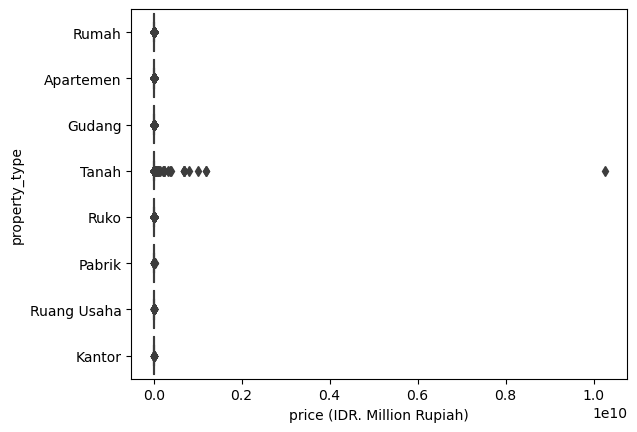

In [57]:
sns.boxplot(x=df['price (IDR. Million Rupiah)'], y=df['property_type'])

This is what it looks like without outliers, but we still need to handle the outliers since some metrics doesn't work properly with the present of outliers.

In [58]:
property_type = list(df['property_type'].unique())
property_type

['Rumah',
 'Apartemen',
 'Gudang',
 'Tanah',
 'Ruko',
 'Pabrik',
 'Ruang Usaha',
 'Kantor']

<AxesSubplot:xlabel='price (IDR. Million Rupiah)', ylabel='property_type'>

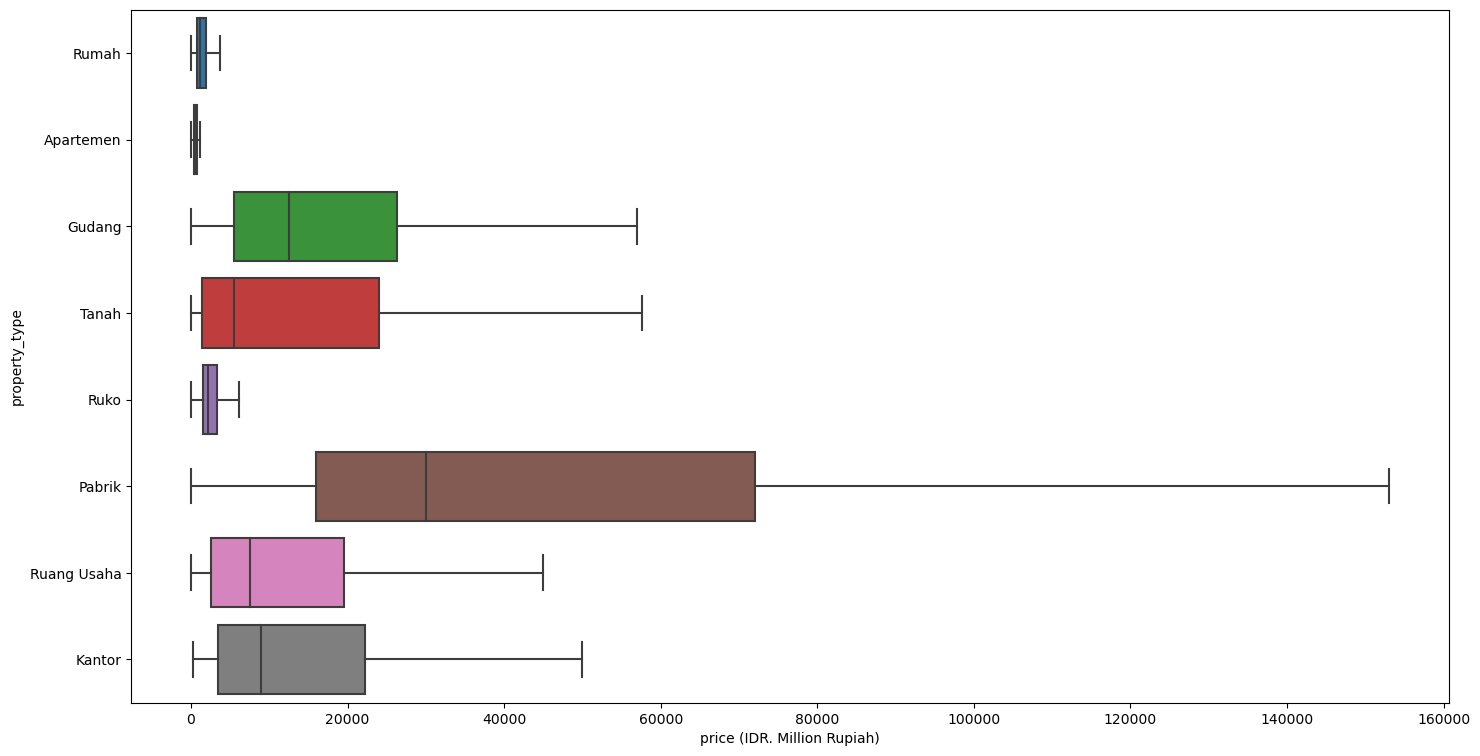

In [59]:
plt.figure(figsize=(17, 9))
sns.boxplot(x=df['price (IDR. Million Rupiah)'], y=df['property_type'], showfliers=False)

### Post Cleaning Analysis

In [60]:
print(f'After cleaning we went from {df_raw.shape[0]} to {df.shape[0]} data points or {(df.shape[0]/df_raw.shape[0])*100:.2f}%')

After cleaning we went from 87504 to 87240 data points or 99.70%


In [61]:
df.describe()

,bed,bath,garage,LT,LB,price_numeric,price (IDR. Million Rupiah)
count,85602.000000,82519.000000,87240.000000,8.407400e+04,8.708300e+04,8.723100e+04,8.723100e+04
mean,2.471508,2.121378,0.911738,3.983024e+05,1.004529e+04,2.383527e+11,2.383527e+05
std,2.057732,2.507301,1.818008,7.602107e+07,2.880397e+06,3.587323e+13,3.587323e+07
min,0.000000,0.000000,0.000000,1.000000e+00,0.000000e+00,2.720000e+03,2.720000e-03
25%,2.000000,1.000000,0.000000,7.500000e+01,5.500000e+01,7.500000e+08,7.500000e+02
50%,3.000000,2.000000,1.000000,1.120000e+02,1.000000e+02,1.300000e+09,1.300000e+03
75%,3.000000,3.000000,1.000000,2.000000e+02,1.760000e+02,2.500000e+09,2.500000e+03
max,99.000000,200.000000,99.000000,2.123000e+10,8.500000e+08,1.025000e+16,1.025000e+10


In [62]:
df.sort_values(by=['price (IDR. Million Rupiah)'], ascending=False).head(3)

,user,phone_number,agent_corporate,property_location,description,price,property_type,bed,bath,garage,LT,LB,listing_type,property_url,price_numeric,price (IDR. Million Rupiah)
32807,Hatipah Kiki,+62813899...,No agent corporate,"Kalimalang, Bekasi",Di Jual Kavling Keren Nice di Jln. Raya Kalimalang Bekasi,"Rp 2,5 Juta /m²",Tanah,0.0,0.0,0.0,4.100000e+09,0.0,Regular,https://www.rumah123.com/properti/bekasi/las3244243/,1.025000e+16,1.025000e+10
12537,Renny (RJ PROPERTY),No phone number,RJ PROPERTY Cikarang,"Bekasi Barat, Bekasi",Dijual Cepat Tanah Bekasi Barat Cocok Untuk Usaha Mall Hotel,Rp 10 Juta /m²,Tanah,0.0,0.0,0.0,1.200000e+08,0.0,Regular,https://www.rumah123.com/properti/bekasi/las3113003/,1.200000e+15,1.200000e+09
34578,Renny RJ,+62811887...,RJ PROPERTY Cikarang,"Bekasi, Bekasi",Dijual Cepat Tanah Bekasi Barat Cocok Untuk Usaha Mall Hotel,Rp 10 Juta /m²,Tanah,0.0,0.0,0.0,1.200000e+08,0.0,Regular,https://www.rumah123.com/properti/bekasi/las3113024/,1.200000e+15,1.200000e+09


# Saved Cleaned Data

Drop price column since we already have Price (IDR. Million Rupiah) column

In [63]:
df.isnull().sum() / df.shape[0]

user                           0.000000
phone_number                   0.000000
agent_corporate                0.000000
property_location              0.000000
description                    0.000000
price                          0.000000
property_type                  0.000000
bed                            0.018776
bath                           0.054115
garage                         0.000000
LT                             0.036291
LB                             0.001800
listing_type                   0.000000
property_url                   0.000000
price_numeric                  0.000103
price (IDR. Million Rupiah)    0.000103
dtype: float64

In [64]:
df[df['LT'].isna()]['property_type'].value_counts(normalize=True)

Apartemen    0.993367
Tanah        0.006633
Name: property_type, dtype: float64

In [65]:
df.shape[0]

87240

In [66]:
df.dropna(inplace=True)

In [67]:
df.isnull().sum() / df.shape[0]

user                           0.0
phone_number                   0.0
agent_corporate                0.0
property_location              0.0
description                    0.0
price                          0.0
property_type                  0.0
bed                            0.0
bath                           0.0
garage                         0.0
LT                             0.0
LB                             0.0
listing_type                   0.0
property_url                   0.0
price_numeric                  0.0
price (IDR. Million Rupiah)    0.0
dtype: float64

In [68]:
df.shape[0]

79192

In [69]:
df.drop(['price', 'price_numeric'], axis=1, inplace=True)

In [70]:
df[df.property_url == 'https://www.rumah123.com/properti/bekasi/hos13715709/']

,user,phone_number,agent_corporate,property_location,description,property_type,bed,bath,garage,LT,LB,listing_type,property_url,price (IDR. Million Rupiah)
0,Julia Lee,+62813662...,Era Sky Harapan Indah,"Harapan Indah, Bekasi",Rumah Siap Huni di Harapan Indah Cluster Adara Bekasi,Rumah,2.0,2.0,1.0,128.0,80.0,Premier,https://www.rumah123.com/properti/bekasi/hos13715709/,1800.0


In [69]:
df.columns

Index(['user', 'phone_number', 'agent_corporate', 'property_location',
       'description', 'property_type', 'bed', 'bath', 'garage', 'LT', 'LB',
       'listing_type', 'property_url', 'price (IDR. Million Rupiah)'],
      dtype='object')

In [70]:
df.to_csv('rumah123_bekasiv2_cleaned.csv', index=False)